In [1]:
#Data Camp course, Mon. Apr 23, 3:11 pm

In [2]:
#Introduction to exploratory data analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_swing = pd.read_csv('https://raw.githubusercontent.com/johnashu/datacamp/master/statistical-thinking-in-python-part-1/2008_swing_states.csv')

In [12]:
df_swing[['state', 'county', 'dem_share']].head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


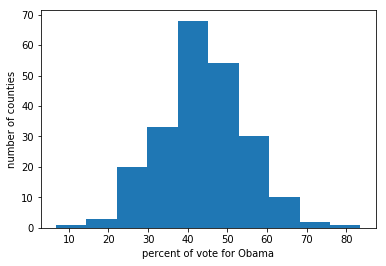

In [13]:
# _ is a common dummy variable in Python
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

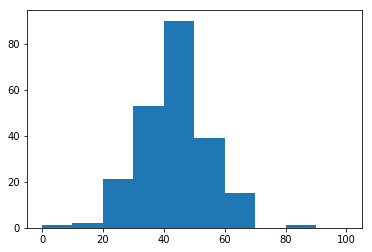

In [15]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(df_swing['dem_share'], bins = bin_edges)
plt.show()

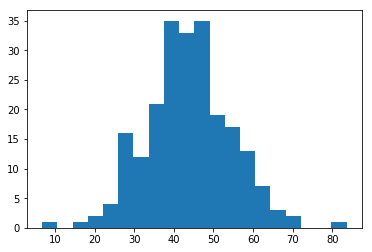

In [16]:
_ = plt.hist(df_swing['dem_share'], bins = 20)
plt.show()

In [17]:
import seaborn as sns

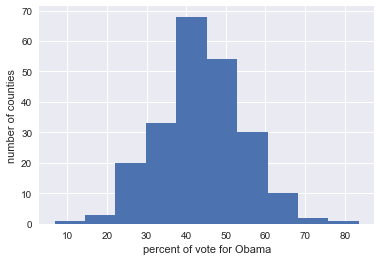

In [19]:
sns.set()
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

Binning bias
- The same data may be interpreted differently depending on choice of bins

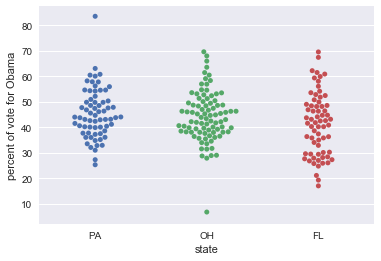

In [20]:
#Bee swarm plot
    #requires well ordered pandas dataframe
    #cols are variables
    #rows are measures
_ = sns.swarmplot(
    x = 'state', y = 'dem_share', data = df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

Note that Obama got less than 50% of the vote in each of the three swing states

## County level voting data for all states East and West of the Mississippi

### (ECDF)
#### Empirical cumulative distribution function 
x-value is the quantity measured (% of vote for Obama)
y-value is fraction of data points smaller than the corresopnding x-value

#### Making and ECDF

In [30]:
import numpy as np

In [31]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [32]:
x = np.sort(df_swing['dem_share'])
list(x)[0:5]
#seems to be sorted in ascending order

[6.7999999999999998,
 17.059999999999999,
 19.329999999999998,
 21.149999999999999,
 24.809999999999999]

In [36]:
y = np.arange(1, len(x) + 1) / len(x)
#what are we doing here?
    # scaling the x axis over it's own magnitude?
list(y[0:5])

[0.0045045045045045045,
 0.0090090090090090089,
 0.013513513513513514,
 0.018018018018018018,
 0.022522522522522521]

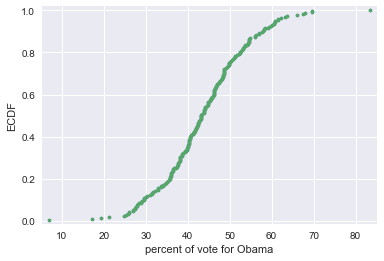

In [38]:
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

Note, that about %78 of counties (y-value) had less than 50% support (x-value) for Obama

In [39]:
def ecdf(data):
    '''Compute (ECDF) 
    Empirical Cumulative Distribution Function 
    for a one-dimensional array of measurements.'''
    # number of data points
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n #just scaling y ticks from 0-1
    
    return x, y

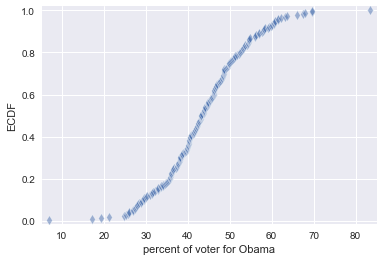

In [47]:
# Compute the ECDF for the county level dem_share of swing states
x, y = ecdf(df_swing.dem_share)

# Generate plot
_ = plt.plot(x, y, marker = 'd', linestyle = 'none',
            alpha = 0.5, markeredgecolor = 'w' ,
            markeredgewidth = .8)

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('percent of voter for Obama')
_ = plt.ylabel('ECDF')

plt.show()

#### Let's plot multiple series

In [48]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [50]:
df_swing.state.value_counts()

OH    88
FL    67
PA    67
Name: state, dtype: int64

In [52]:
x_pa, y_pa = ecdf(df_swing.dem_share[df_swing.state == 'PA'])
x_fl, y_fl = ecdf(df_swing.dem_share[df_swing.state == 'FL'])
x_oh, y_oh = ecdf(df_swing.dem_share[df_swing.state == 'OH'])

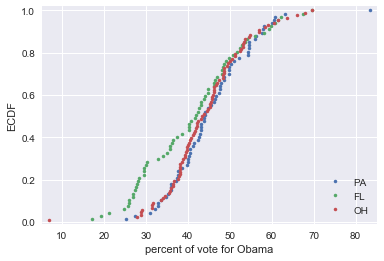

In [61]:
plt.plot(x_pa, y_pa, marker = '.', linestyle = 'none')
plt.plot(x_fl, y_fl, marker = '.', linestyle = 'none')
plt.plot(x_oh, y_oh, marker = '.', linestyle = 'none')

plt.margins(0.02)

plt.legend(('PA', 'FL', 'OH'), loc = 'lower right')

plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

plt.show()

Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone. -- John Tukey